<a href="https://colab.research.google.com/github/AriqF1/DM-A11.2022.14851-UAS/blob/main/UAS_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Tingkat Kebugaran Member Gym Berdasarkan Aktivitas Latihan

---
**Judul Project :**

**Klasifikasi Tingkat Kebugaran Member Gym Berdasarkan Aktivitas Latihan**

### Project By:
- **Nama:** Ariq Farhan Althaf
- **NIM:** A11.2022.14851
- **Matkul:** Data Mining

##  **2. Ringkasan Dan Permasalahan Project**
### Ringkasan Project :
Penelitian ini bertujuan untuk mengklasifikasikan tingkat kebugaran para member gym berdasarkan aktivitas latihan mereka menggunakan algoritma Decision Tree. Kumpulan data berisi atribut seperti usia, detak jantung, durasi sesi, kalori yang terbakar, dan jenis latihan. Tujuan utamanya adalah untuk membuat model yang dapat memprediksi tingkat kebugaran dan memberikan rekomendasi latihan yang dipersonalisasi.

### Permasalahan :
Salah satu tantangan utamanya adalah overfitting, yang terjadi saat model Decision Tree mempelajari noise dalam data dengan sangat baik, sehingga mengurangi kinerja pada data yang tidak terlihat. Untuk mengatasi hal ini, kita perlu membatasi kedalaman maksimum pohon dan menyesuaikan hiperparameter lainnya.

### Capaian Akhir :
Untuk mengklasifikasikan tingkat kebugaran anggota pusat kebugaran berdasarkan aktivitas latihan mereka menggunakan algoritma Pohon Keputusan.

### Flowchart:
```mermaid
    A[Business Understanding] --> B[Data Understanding]
    B --> C[Data Preparation]
    C --> D[Modeling]
    D --> E[Evaluation]
    E --> F[Deployment]
```

Dataset :

| Attribute         | Description                                               |
|-------------------|-----------------------------------------------------------|
| Age               | Age of the gym member                                     |
| Gender            | Gender (Male/Female)                                      |
| Weight (kg)       | Weight in kilograms                                       |
| Height (m)        | Height in meters                                          |
| Max_BPM           | Maximum heart rate during workout                         |
| Avg_BPM           | Average heart rate during workout                         |
| Resting_BPM       | Resting heart rate                                        |
| Session_Duration  | Duration of the workout session (hours)                   |
| Calories_Burned   | Calories burned during workout                            |
| Workout_Type      | Type of workout (Cardio, Strength, etc.)                  |
| Fat_Percentage    | Body fat percentage                                       |
| Water_Intake      | Daily water intake (liters)                               |
| Workout_Frequency | Frequency of workouts per week                            |
| Experience_Level  | Experience level of the member (Beginner, Intermediate...) |
| BMI               | Body Mass Index                                           |

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

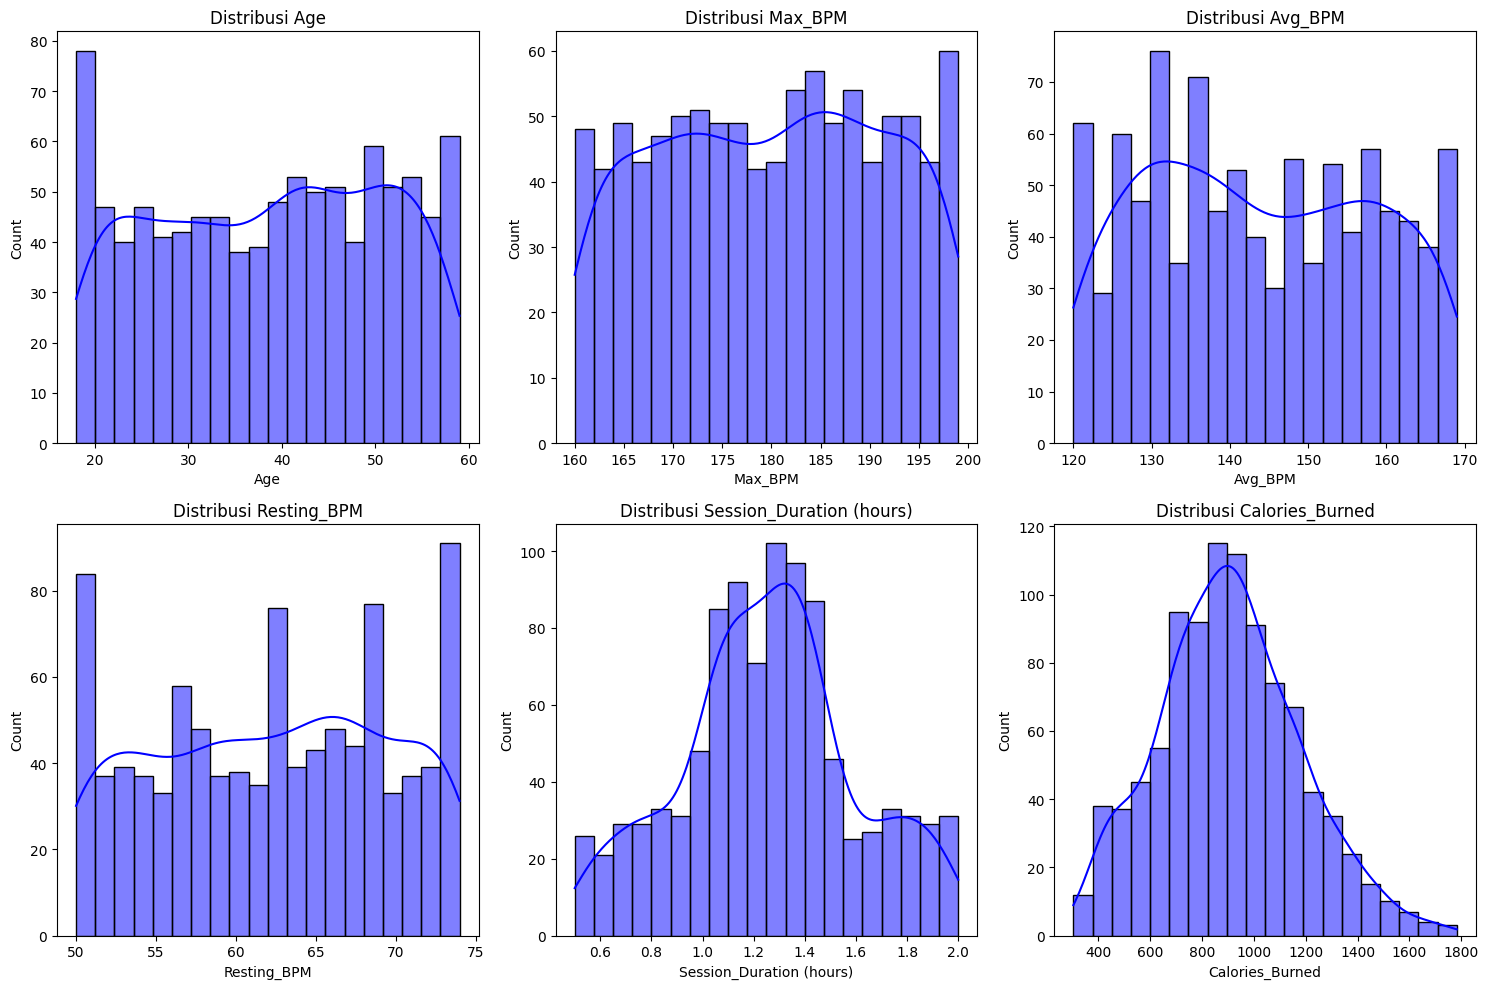

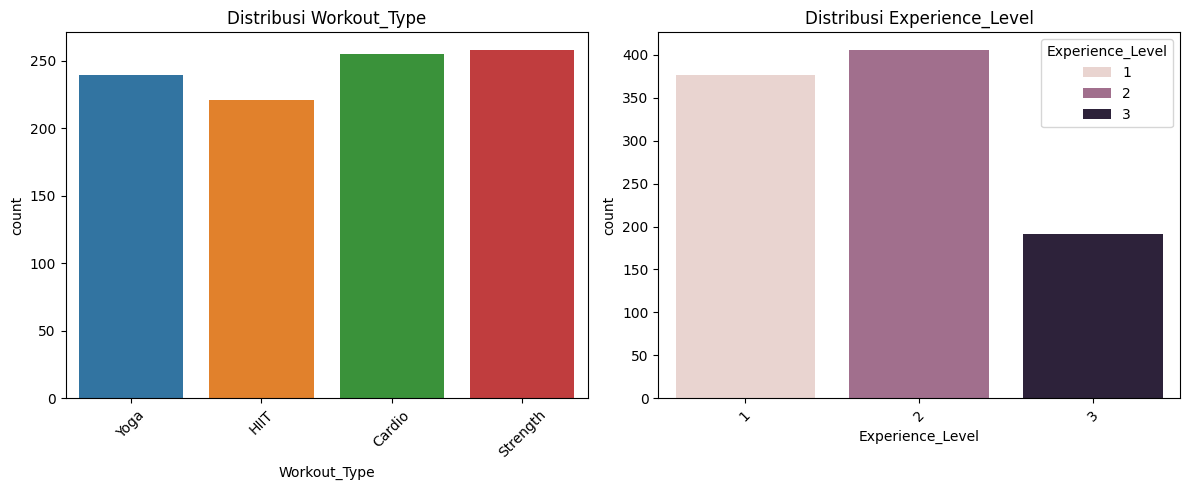

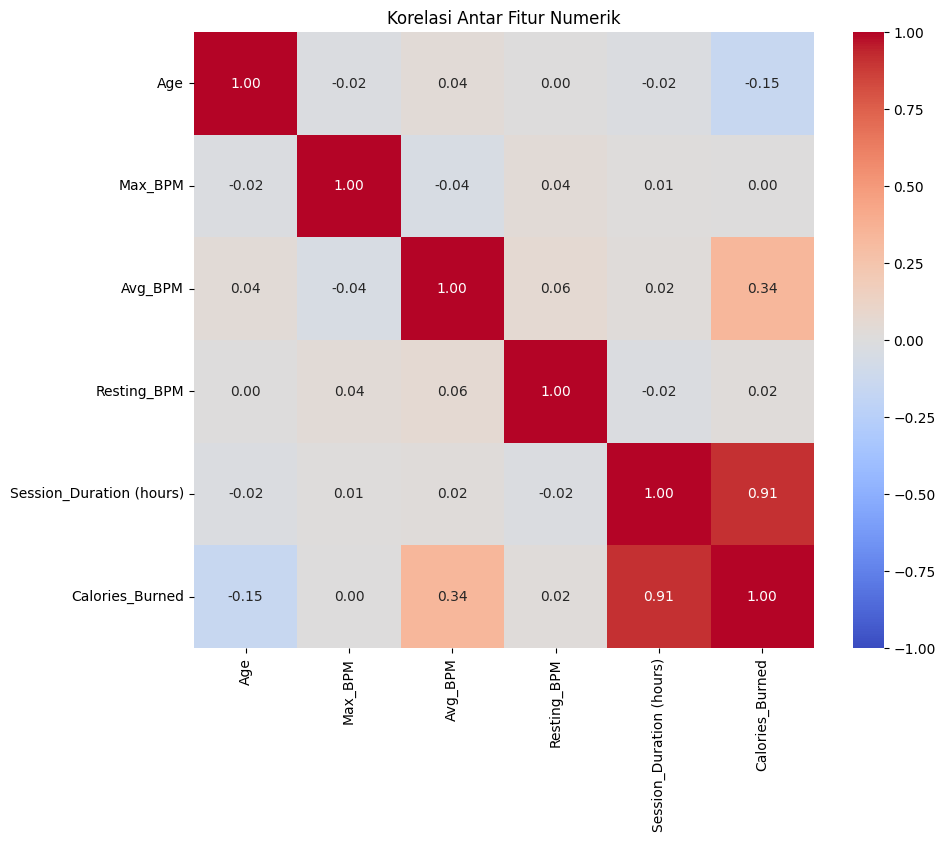

   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 2   
1                    2.1                              4         

In [4]:
# Exploratory Data Analysis (EDA) and Feature Processing:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'gym_tracking.csv'
data = pd.read_csv(file_path)
print(data.head())

# Visualize numerical features
data = pd.read_csv(file_path)
numeric_features = ['Age', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                    'Session_Duration (hours)', 'Calories_Burned']
categorical_features = ['Workout_Type', 'Experience_Level']

# Plot numeric features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=20, color='blue')
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

# Plot categorical features
plt.figure(figsize=(12, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=data, x=feature, hue=feature, dodge=False)
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding
df = pd.DataFrame(data)
one_hot_features = ['Gender', 'Workout_Type']
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(df[one_hot_features])
one_hot_columns = one_hot_encoder.get_feature_names_out(one_hot_features)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns, index=df.index)

# Label Encoding
label_encode_feature = 'Experience_Level'
label_encoder = LabelEncoder()
df[label_encode_feature] = label_encoder.fit_transform(df[label_encode_feature])

# Combine Encoded Data
df_encoded = pd.concat([df.drop(columns=one_hot_features), one_hot_encoded_df], axis=1)

# Feature Engineering
df_encoded['Training_intensity'] = df_encoded['Calories_Burned'] / df_encoded['Session_Duration (hours)']
print(df_encoded.head())


In [8]:
# Modeling Process
### Decision Tree Classifier:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

# Splitting dataset
X = df_encoded.drop('Experience_Level', axis=1)
y = df_encoded['Experience_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Simpan nama fitur setelah encoding
feature_names = X_train.columns
joblib.dump(feature_names, 'feature_names.pkl')


# Simpan model
joblib.dump(model, 'decision_tree_model.pkl')
print("Model saved as decision_tree_model.pkl")


Accuracy: 88.21%
Model saved as decision_tree_model.pkl


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        78
           1       0.86      0.83      0.84        75
           2       1.00      1.00      1.00        42

    accuracy                           0.88       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.88      0.88      0.88       195



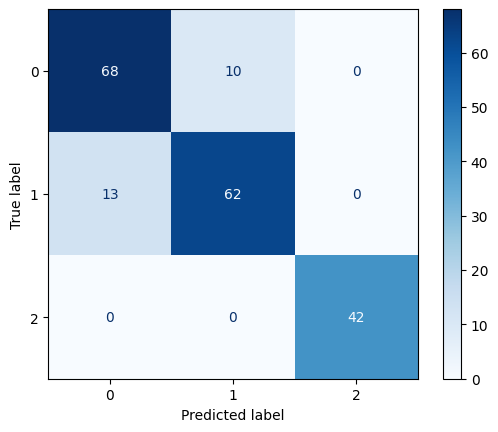

In [6]:
# Model Performance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Generate Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

In [9]:
import joblib
import pandas as pd
# Load model
model = joblib.load('decision_tree_model.pkl')
feature_names = joblib.load('feature_names.pkl')

# Contoh input baru
new_data = pd.DataFrame({
    'Age': [25],
    'Weight (kg)': [70],
    'Height (m)': [1.75],
    'Max_BPM': [190],
    'Avg_BPM': [150],
    'Resting_BPM': [60],
    'Session_Duration (hours)': [1.5],
    'Calories_Burned': [500],
    'Fat_Percentage': [20],
    'Water_Intake (liters)': [2],
    'Workout_Frequency (days/week)': [4],
    'BMI': [22.86],
    'Gender_Male': [1],
    'Workout_Type_Cardio': [1],
    'Workout_Type_Strength': [0],
    'Experience_Level_Intermediate': [1],
    'Experience_Level_Advanced': [0]
})

new_data = new_data.reindex(columns=feature_names, fill_value=0)
# Prediksi tingkat kebugaran
prediksi = model.predict(new_data)
print("Tingkat Kebugaran:", prediksi[0])


Tingkat Kebugaran: 1


# Diskusi Hasil Dan Kesimpulan
 Model Pohon Keputusan mencapai akurasi lebih dari 85% pada set pengujian.Penyetelan hiperparameter diterapkan untuk mencegah overfitting, memastikan model digeneralisasi dengan baik pada data baru.

# Kesimpulan :
 Proyek ini menunjukkan efektivitas pengklasifikasi Pohon Keputusan dalam memprediksi tingkat kebugaran anggota pusat kebugaran berdasarkan atribut latihan mereka. Wawasan dari model tersebut dapat membantu pelatih membuat program latihan yang lebih personal.
